In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
import graphviz
import pydot
from io import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
wine=pd.read_csv("winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine['quality']=wine['quality']>6
wine['quality'].describe()

count      1599
unique        2
top       False
freq       1382
Name: quality, dtype: object

In [4]:
np.random.seed(42)
train, test =train_test_split(wine, test_size=0.5)
val, test =train_test_split(test, test_size=0.5) #Split the test set into test and validation set 
X_train = train.drop(columns = ['quality']).values
y_train = train['quality'].values
X_val = val.drop(columns = ['quality']).values
y_val = val['quality'].values
X_test = test.drop(columns = ['quality']).values
y_test = test['quality'].values

In [5]:
#Function to generate a image of the tree classifier
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

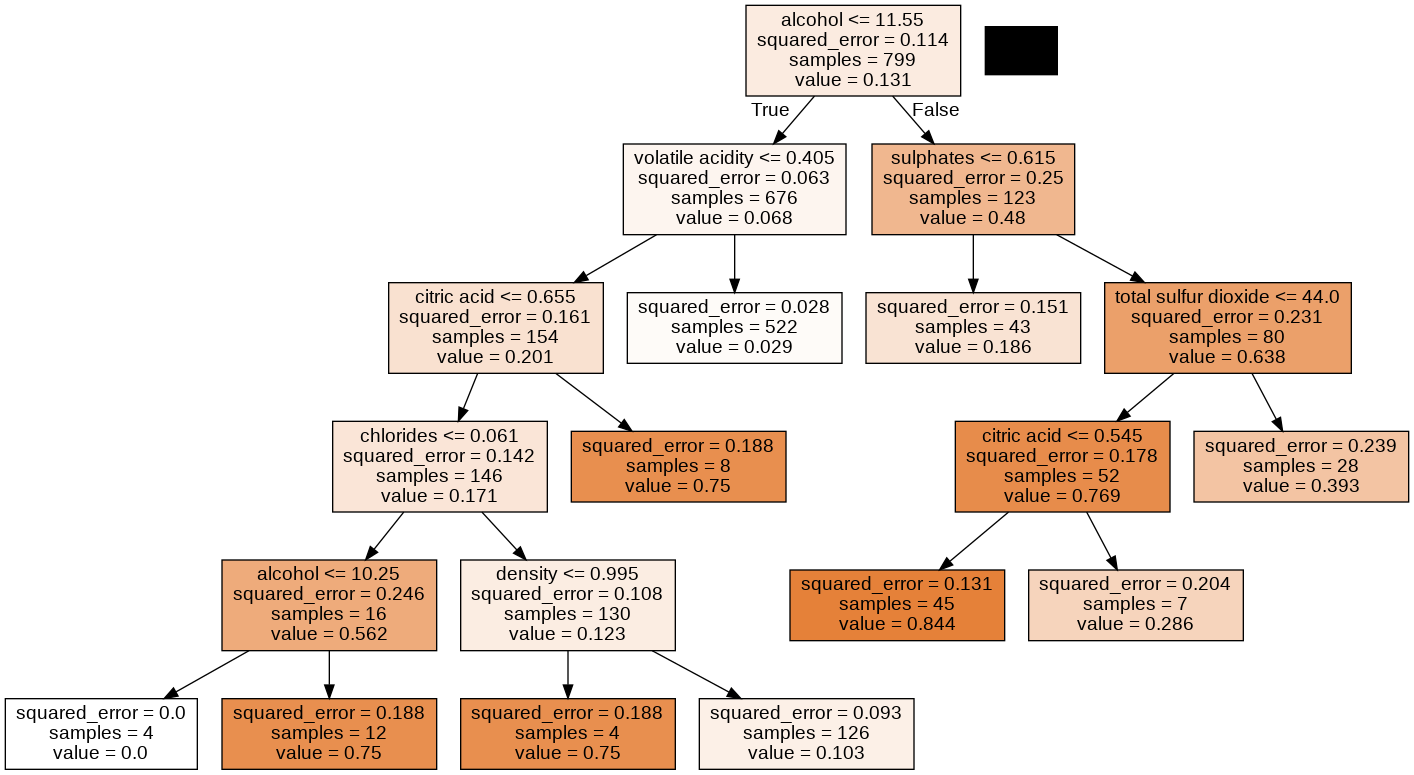

In [6]:
#CART
wine_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.002)
wine_tree.fit(X_train, y_train)
graph, = print_tree(wine_tree, features= train.drop(columns = ['quality']).columns)
Image(graph.create_png())

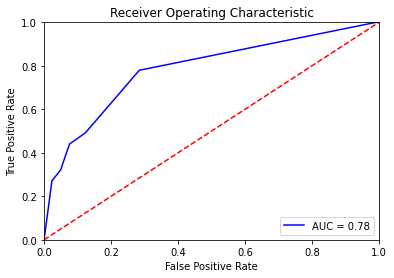

array([[324,  17],
       [ 40,  19]])

In [7]:
#Using CART model to make predictions in the test set
wine_tree_preds = wine_tree.predict(X_test)

fpr, tpr, threshold = roc_curve(test['quality'], wine_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

confusion_matrix(test['quality'], (wine_tree_preds > 0.5))

In [8]:
#RandomForest
wine_rf = RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=1)
wine_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=1)

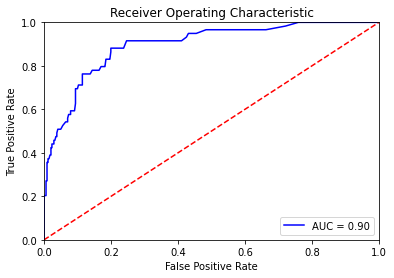

array([[332,   9],
       [ 33,  26]])

In [9]:
#Using Random forest model to make predictions in the test set
wine_rf_preds = wine_rf.predict(X_test)

fpr, tpr, threshold = roc_curve(test['quality'], wine_rf_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

confusion_matrix(test['quality'], (wine_rf_preds > 0.5))

In [10]:
#Gradient Boosting
wine_boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.09,random_state=1)
wine_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.09, n_estimators=1000, random_state=1)

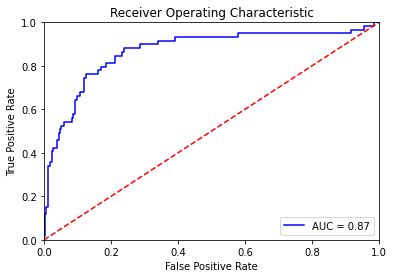

array([[323,  18],
       [ 28,  31]])

In [11]:
#Using CART model to make predictions in the test set
wine_boost_preds = wine_boost.predict(X_test)

fpr, tpr, threshold = roc_curve(test['quality'], wine_boost_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

confusion_matrix(test['quality'], (wine_boost_preds > 0.5))

In [17]:
#Multi-layer neural net 
input_tensor=keras.Input(shape=(11,))
x1=layers.Dense(9, activation='relu', name="dense_1")(input_tensor)
x2=layers.Dense(9, activation='relu', name="dense_2")(x1)
x3=layers.Dense(9, activation='sigmoid', name="dense_3")(x2)
output_tensor=layers.Dense(1,activation='linear',name='predictions')(x3)

model=keras.Model(inputs=input_tensor,outputs=output_tensor)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])
model.fit(X_train,y_train,epochs=250,batch_size=70)


Epoch 1/250
12/12 [==============================] - 1s 2ms/step - loss: 0.1523 - mean_squared_error: 0.1523
Epoch 2/250
12/12 [==============================] - 0s 2ms/step - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 3/250
12/12 [==============================] - 0s 2ms/step - loss: 0.1126 - mean_squared_error: 0.1126
Epoch 4/250
12/12 [==============================] - 0s 2ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 5/250
12/12 [==============================] - 0s 2ms/step - loss: 0.1095 - mean_squared_error: 0.1095
Epoch 6/250
12/12 [==============================] - 0s 2ms/step - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 7/250
12/12 [==============================] - 0s 2ms/step - loss: 0.1095 - mean_squared_error: 0.1095
Epoch 8/250
12/12 [==============================] - 0s 3ms/step - loss: 0.1091 - mean_squared_error: 0.1091
Epoch 9/250
12/12 [==============================] - 0s 3ms/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 10/250
12/12 

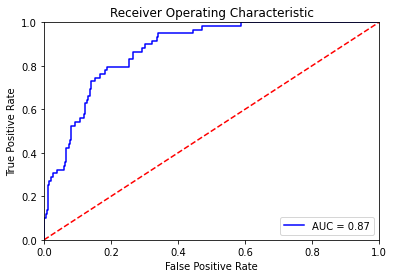

array([[341,   0],
       [ 56,   3]])

In [18]:
#Using deep learning model to make predictions in the test set
preds=model.predict(X_test)
wine_nnet_preds=preds*np.std(y_test)+np.mean(y_test)

fpr, tpr, threshold = roc_curve(test['quality'], wine_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

confusion_matrix(test['quality'], (wine_nnet_preds > 0.5))